In [45]:
import pandas as pd
import numpy as np
import sqlite3 as sq3

In [46]:
# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
file_path = '/Users/benny/Downloads/USD_JPY Historical Data.csv'

# Use pandas to read the Excel file
df = pd.read_csv(file_path)

# Print the dataframe to verify it was read correctly
print(df)

            Date   Price    Open    High     Low  Vol. Change %
0     05/17/2024  155.65  155.40  155.99  155.25   NaN    0.16%
1     05/16/2024  155.41  154.30  155.54  153.60   NaN    0.72%
2     05/15/2024  154.30  156.52  156.56  154.15   NaN   -1.42%
3     05/14/2024  156.52  156.24  156.76  156.22   NaN    0.21%
4     05/13/2024  156.20  155.74  156.30  155.55   NaN    0.31%
...          ...     ...     ...     ...     ...   ...      ...
3746  01/07/2010   93.45   92.36   93.77   92.11   NaN    1.16%
3747  01/06/2010   92.38   91.56   92.74   91.53   NaN    0.87%
3748  01/05/2010   91.58   92.47   92.51   91.25   NaN   -0.97%
3749  01/04/2010   92.47   92.75   93.21   92.19   NaN   -0.60%
3750  01/01/2010   93.04   93.04   93.04   93.04   NaN    0.01%

[3751 rows x 7 columns]


In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.sort_index(ascending=True,inplace=True)
print(df)

             Price    Open    High     Low  Vol. Change %
Date                                                     
2010-01-01   93.04   93.04   93.04   93.04   NaN    0.01%
2010-01-04   92.47   92.75   93.21   92.19   NaN   -0.60%
2010-01-05   91.58   92.47   92.51   91.25   NaN   -0.97%
2010-01-06   92.38   91.56   92.74   91.53   NaN    0.87%
2010-01-07   93.45   92.36   93.77   92.11   NaN    1.16%
...            ...     ...     ...     ...   ...      ...
2024-05-13  156.20  155.74  156.30  155.55   NaN    0.31%
2024-05-14  156.52  156.24  156.76  156.22   NaN    0.21%
2024-05-15  154.30  156.52  156.56  154.15   NaN   -1.42%
2024-05-16  155.41  154.30  155.54  153.60   NaN    0.72%
2024-05-17  155.65  155.40  155.99  155.25   NaN    0.16%

[3751 rows x 6 columns]


In [48]:
df['MA1'] = df['Price'].rolling(window=50).mean()
df['MA2'] = df['Price'].rolling(window=296).mean()
df['returns'] = np.log(df['Price'] / df['Price'].shift(1))
print(df)

             Price    Open    High     Low  Vol. Change %       MA1  \
Date                                                                  
2010-01-01   93.04   93.04   93.04   93.04   NaN    0.01%       NaN   
2010-01-04   92.47   92.75   93.21   92.19   NaN   -0.60%       NaN   
2010-01-05   91.58   92.47   92.51   91.25   NaN   -0.97%       NaN   
2010-01-06   92.38   91.56   92.74   91.53   NaN    0.87%       NaN   
2010-01-07   93.45   92.36   93.77   92.11   NaN    1.16%       NaN   
...            ...     ...     ...     ...   ...      ...       ...   
2024-05-13  156.20  155.74  156.30  155.55   NaN    0.31%  152.5044   
2024-05-14  156.52  156.24  156.76  156.22   NaN    0.21%  152.6340   
2024-05-15  154.30  156.52  156.56  154.15   NaN   -1.42%  152.7326   
2024-05-16  155.41  154.30  155.54  153.60   NaN    0.72%  152.8802   
2024-05-17  155.65  155.40  155.99  155.25   NaN    0.16%  153.0518   

                   MA2   returns  
Date                              
2010-0

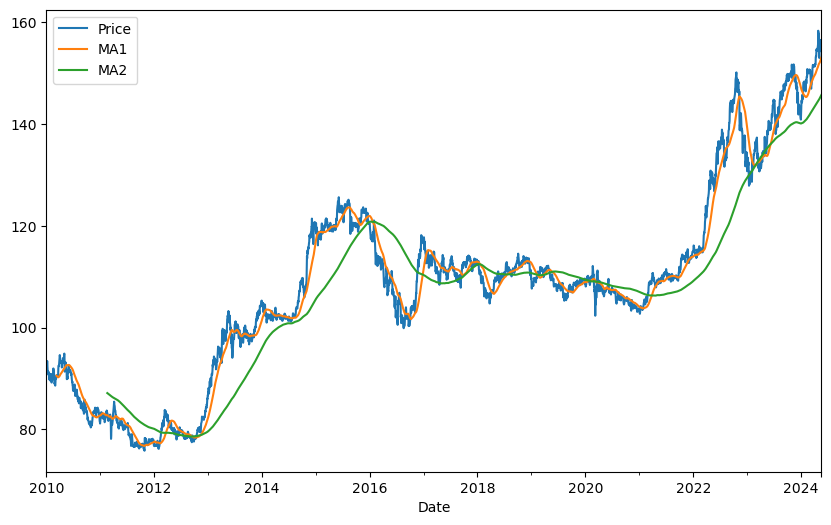

In [49]:
df[['Price', 'MA1','MA2']].plot(figsize=(10, 6));

In [50]:
df['position'] = np.where(df['MA1'] > df['MA2'],1, -1)

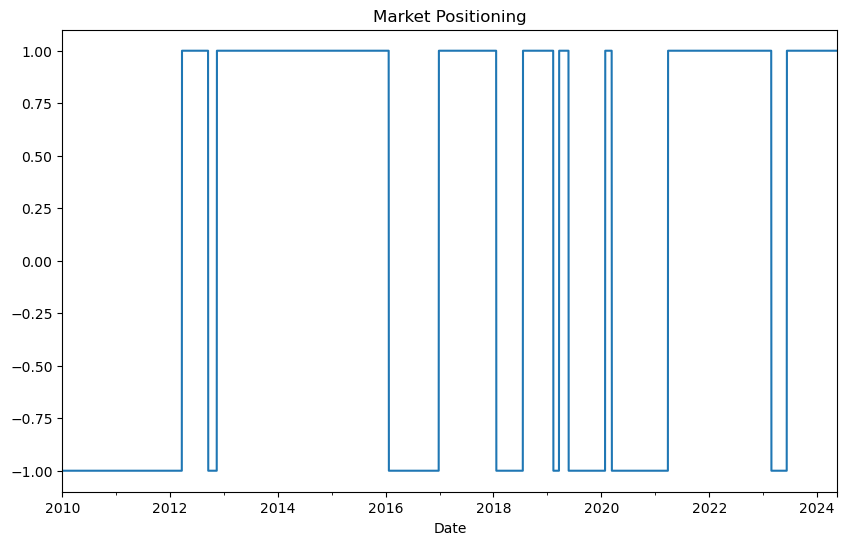

In [51]:
df['position'].plot(ylim=[-1.1, 1.1],
title='Market Positioning',
figsize=(10, 6));

In [52]:
df['strategy'] = df['position'].shift(1) * df['returns']

In [53]:
df[['returns', 'strategy']].sum()

returns     0.514580
strategy    0.557804
dtype: float64

In [54]:
df[['returns', 'strategy']].sum().apply(np.exp)

returns     1.672936
strategy    1.746832
dtype: float64

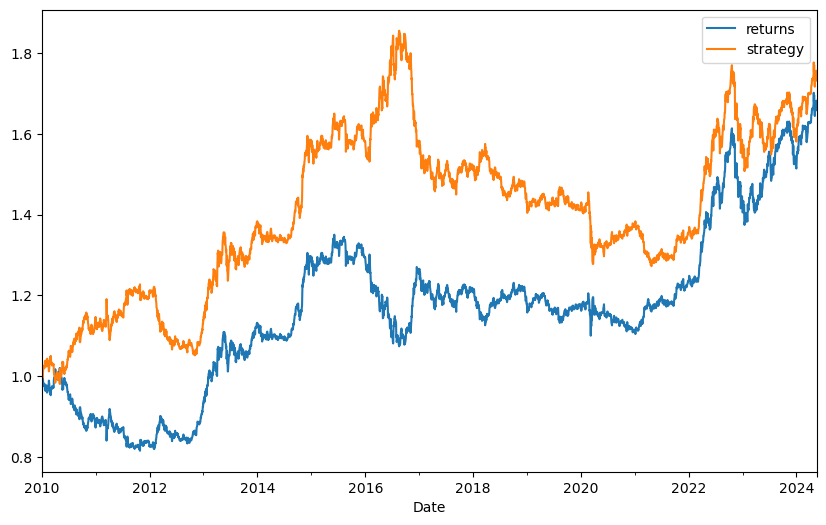

In [55]:
df[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

NameError: name 'ta' is not defined